### 梯度下降法
- 不是一个机器学习算法
- 是一种基于搜索的最优化方法
- 作用：最小化一个损失函数
- 梯度上升法：最大化一个效用函数
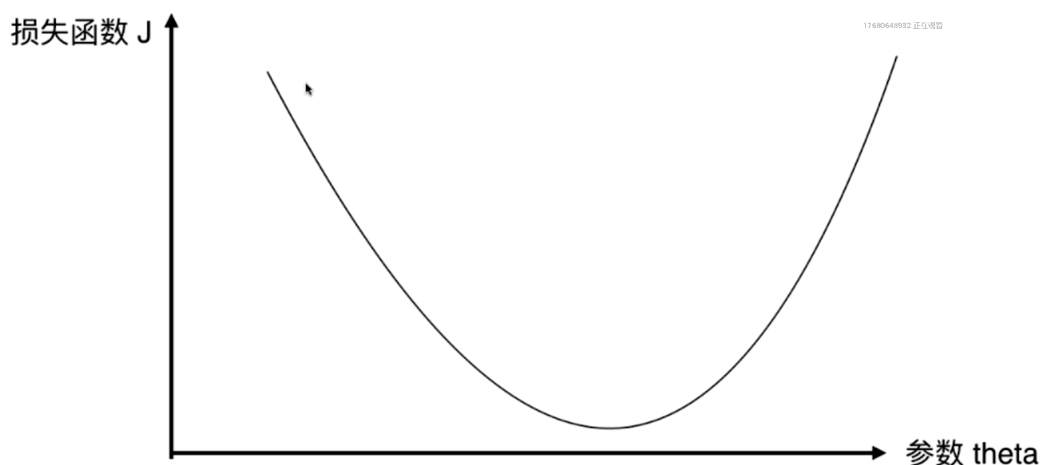
- $\theta$有损失函数 <font size=5>$\frac{dJ}{d\theta}$</font>
- 曲线方程中，导数代表切线斜率
- 导数代表$\theta$单位变化时，J相应的变化
- 导数代表方向 对应J增大的方向
- 移动步长 $\eta$

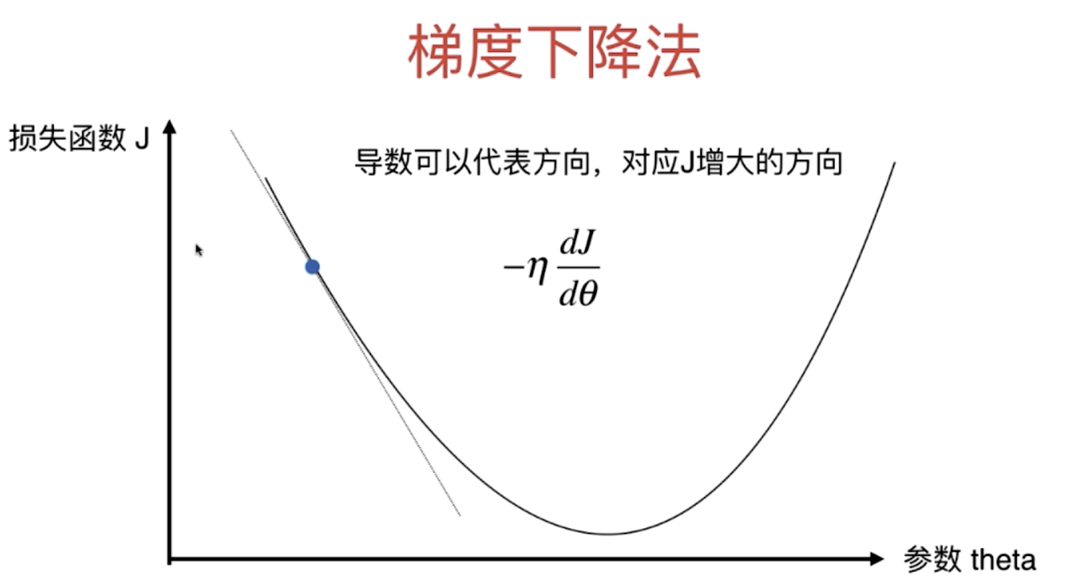
- 朝着梯度减小的情况前进 
- $\eta$为对应的值

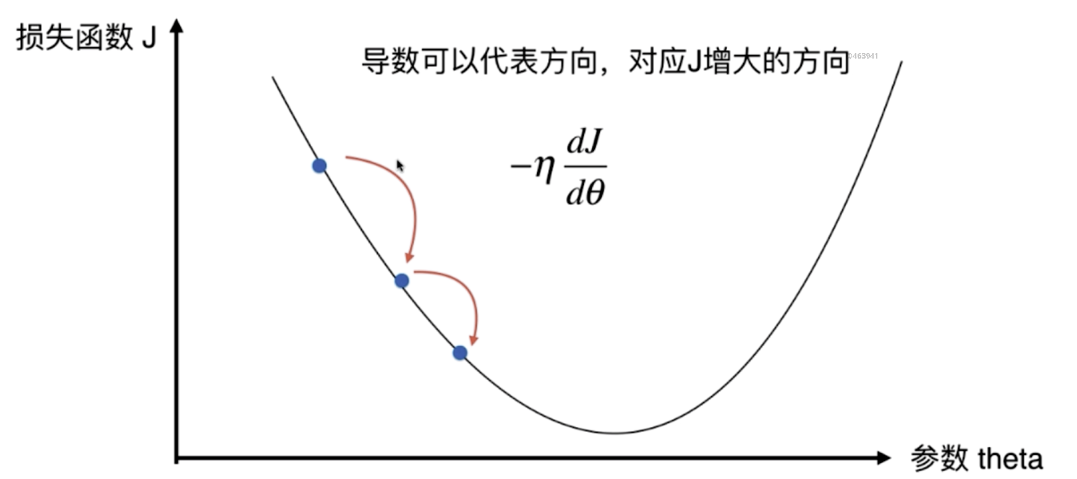
- <font size=5>向右移动 $dJ$ < 0  $\eta$ > 0 $-\eta\frac{dJ}{d\theta} > 0 $</font>

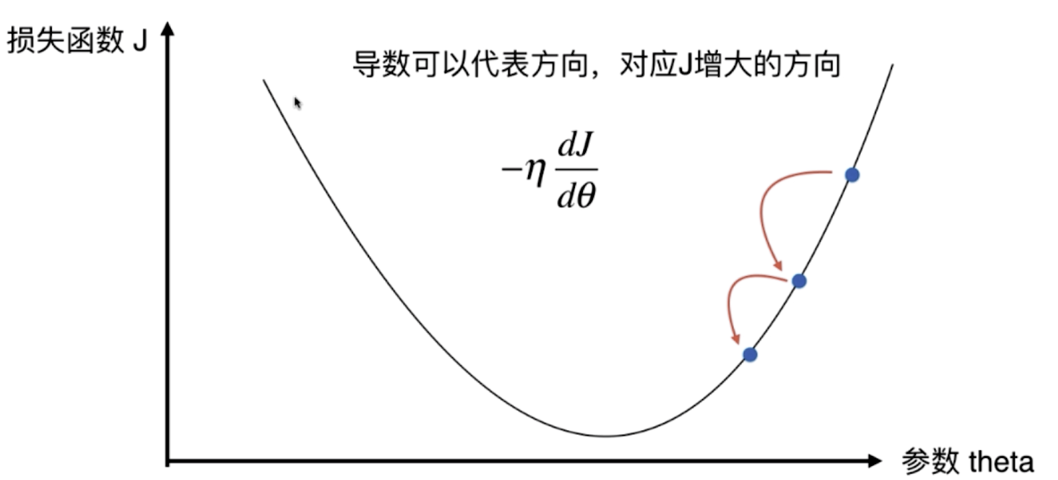
- <font size = 5> 向左移动 $dJ$ <0 $\eta$ >0 $d\theta$ <0  结果$-\eta\frac{dJ}{d\theta} < 0$</font>

<font size=5> 
- $\eta$是学习率（learning rate）
- $\eta$的取值影响获得最优解的速度
- $\eta$取值不适合 甚至得不到最优解
- $\eta$是梯度下降法的一个超参数(需要调参数达到最优效率)
</font>

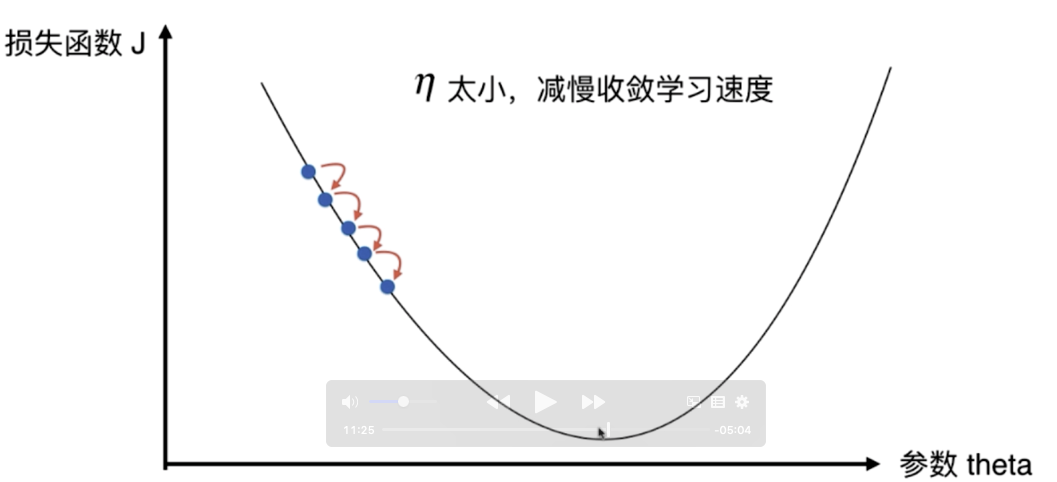

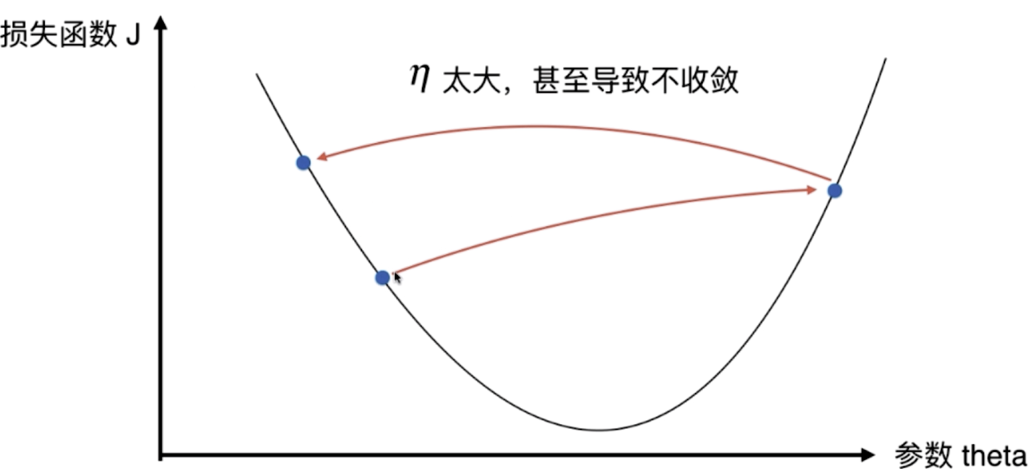

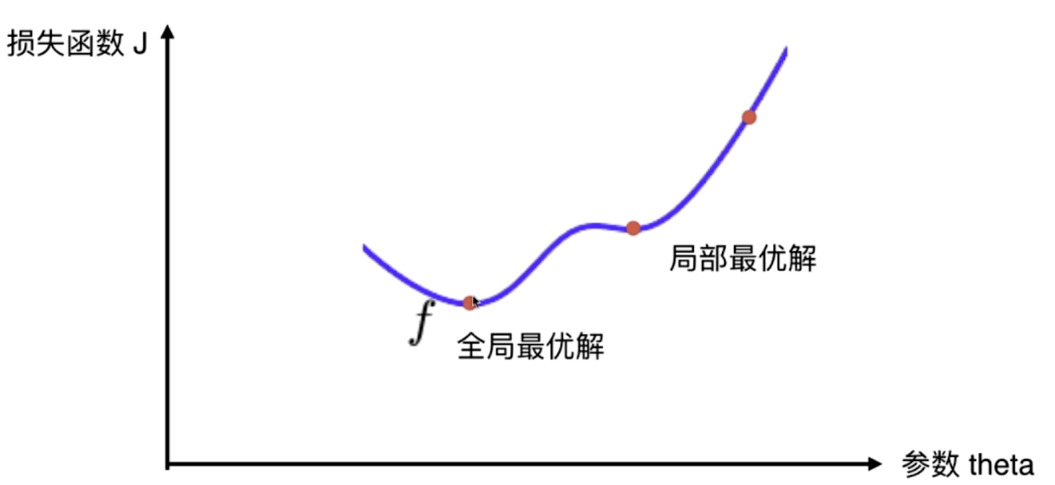
<font size=5> 并不是所有函数都有唯一的极值点 </font>

解决方案：
- 多次运行，随机化初始点
- 梯度下降法的初始点也是一个超参数（若在左边 可以一次性  全局最优解）


#### 线性回归中使用梯度下降法

 - <font size=5>目标：使$\sum_{i=1}{m}(y^{(i)} - \hat{y}^{(i)})^{2}$</font>
 - 线性回归法的损失函数具有唯一的最优解
   - 不需要重复多次初始化进行梯度最小化

## 6-2 模拟实现梯度下降法

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plot_x = np.linspace(-1,6,141)#曲线 141个点
plot_x

array([-1.  , -0.95, -0.9 , -0.85, -0.8 , -0.75, -0.7 , -0.65, -0.6 ,
       -0.55, -0.5 , -0.45, -0.4 , -0.35, -0.3 , -0.25, -0.2 , -0.15,
       -0.1 , -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,
        0.35,  0.4 ,  0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,
        0.8 ,  0.85,  0.9 ,  0.95,  1.  ,  1.05,  1.1 ,  1.15,  1.2 ,
        1.25,  1.3 ,  1.35,  1.4 ,  1.45,  1.5 ,  1.55,  1.6 ,  1.65,
        1.7 ,  1.75,  1.8 ,  1.85,  1.9 ,  1.95,  2.  ,  2.05,  2.1 ,
        2.15,  2.2 ,  2.25,  2.3 ,  2.35,  2.4 ,  2.45,  2.5 ,  2.55,
        2.6 ,  2.65,  2.7 ,  2.75,  2.8 ,  2.85,  2.9 ,  2.95,  3.  ,
        3.05,  3.1 ,  3.15,  3.2 ,  3.25,  3.3 ,  3.35,  3.4 ,  3.45,
        3.5 ,  3.55,  3.6 ,  3.65,  3.7 ,  3.75,  3.8 ,  3.85,  3.9 ,
        3.95,  4.  ,  4.05,  4.1 ,  4.15,  4.2 ,  4.25,  4.3 ,  4.35,
        4.4 ,  4.45,  4.5 ,  4.55,  4.6 ,  4.65,  4.7 ,  4.75,  4.8 ,
        4.85,  4.9 ,  4.95,  5.  ,  5.05,  5.1 ,  5.15,  5.2 ,  5.25,
        5.3 ,  5.35,

In [3]:
plot_y = (plot_x - 2.5)**2 -1

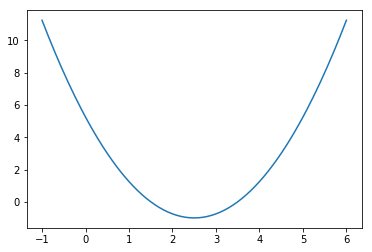

In [4]:
plt.plot(plot_x,plot_y)
plt.show()

In [5]:
def dJ(theta):
    return 2*(theta - 2.5)

In [6]:
def J(theta):
    return (theta - 2.5)**2 - 1

In [7]:
eta = 0.1
epsilon = 1e-8
#精度判断 
theta = 0.0
while True:
    #求导数
    gradient = dJ(theta)
    #保存上一次的theta
    last_theta = theta
    theta = theta - eta * gradient
    
    if(abs(theta)- abs(last_theta) < epsilon):
        break

print(theta)
print(J(theta))

2.4999999646630586
-0.9999999999999988


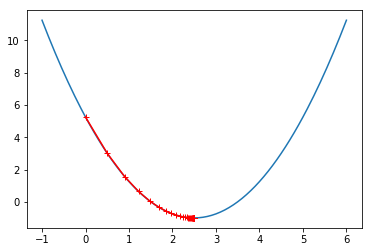

In [8]:
#记录theta每次的结果
theta = 0.0
theta_history = [theta]
while True:
    #求导数
    gradient = dJ(theta)
    #保存上一次的theta
    last_theta = theta
    theta = theta - eta * gradient
    theta_history.append(theta)
    
    if(abs(theta)- abs(last_theta) < epsilon):
        break
plt.plot(plot_x,J(plot_x))
plt.plot(np.array(theta_history),J(np.array(theta_history)),color='r',marker='+')
plt.show()

- 梯度下降法 挪动幅度大
- 趋势比较抖一开始，慢慢变缓


In [9]:
len(theta_history)

82

#### 进行封装

In [10]:
def gradient_descent(initial_theta,eta,epsilon=1e-8):
    theta = initial_theta
    theta_history.append(initial_theta)
    
    while True:
        gradient = dJ(theta)
        last_theta = theta
        theta = theta - eta*gradient
        theta_history.append(theta)
        
        if(abs(theta)- abs(last_theta) < epsilon):
            break
            
            
def plot_theta_history():
    plt.plot(plot_x,J(plot_x))
    plt.plot(np.array(theta_history),J(np.array(theta_history)),color='r',marker='+')
    plt.show()

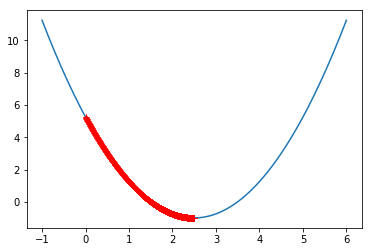

In [11]:
eta = 0.001
theta_history = []
gradient_descent(0.,eta)
#initial_theta = 0.0
plot_theta_history()

In [12]:
print(len(theta_history))

6557


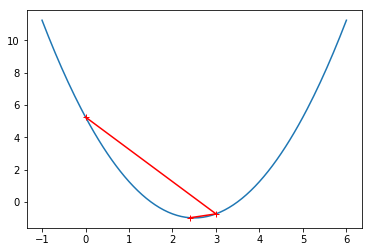

In [13]:
eta = 0.6
theta_history = []
gradient_descent(0.,eta)
plot_theta_history()

In [14]:
eta = 1.1
theta_history = []
gradient_descent(0.,eta)

- eta过大的话 会报错
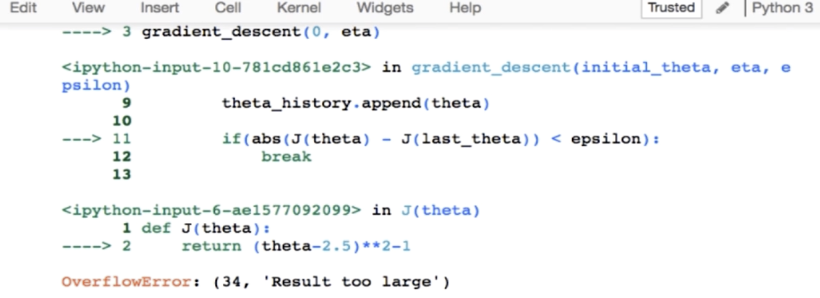

In [15]:
#处理问题 float浮点值最大值 会出现死循环
def J(theta):
    try:
        return (theta - 2.5)**2 - 1
    except:
        return float('inf')

<font size=5>会出现死循环 无穷- 无穷 nan</font>

In [16]:
def gradient_descent(initial_theta,eta,n_iters = 1e4 ,epsilon=1e-8):
    theta = initial_theta
    theta_history.append(initial_theta)
    i_iter = 0
    while i_iter < n_iters:
        gradient = dJ(theta)
        last_theta = theta
        theta = theta - eta*gradient
        theta_history.append(theta)
        
        if(abs(theta)- abs(last_theta) < epsilon):
            break
        i_iter += 1  

In [17]:
len(theta_history)

3

In [18]:
theta_history[-1]

-1.1000000000000005

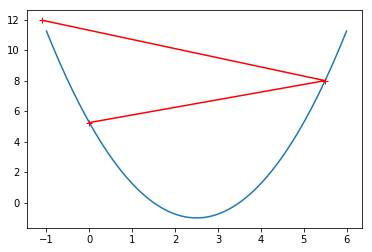

In [19]:
eta = 1.1
theta_history = []
gradient_descent(0.,eta,n_iters=10)
plot_theta_history()

### eta = 0.01是正常值
- 出现问题 查看history值

## 6-3 线性回归中的梯度下降法（多元线性回归中的梯度下降）
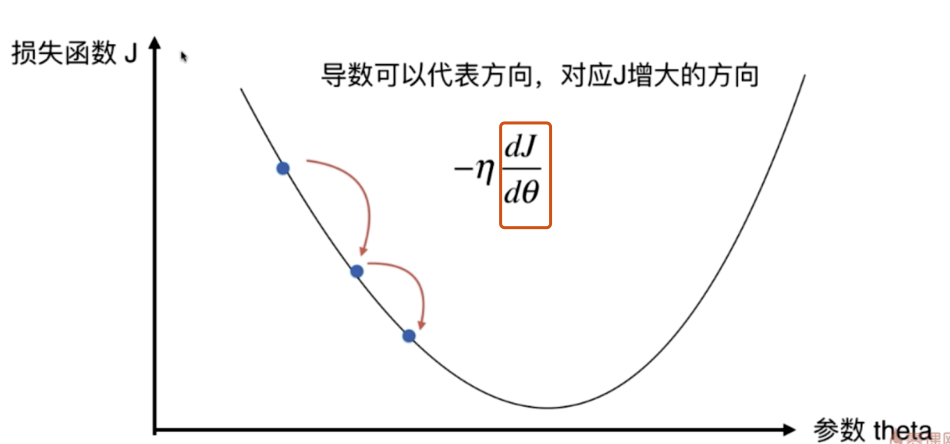

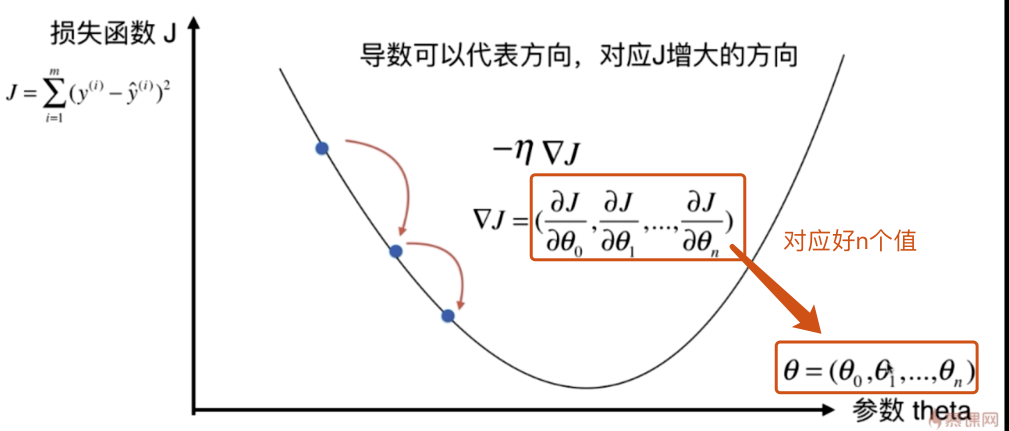
<font size=5>梯度代表方向 对应J增大最快的方向</font>

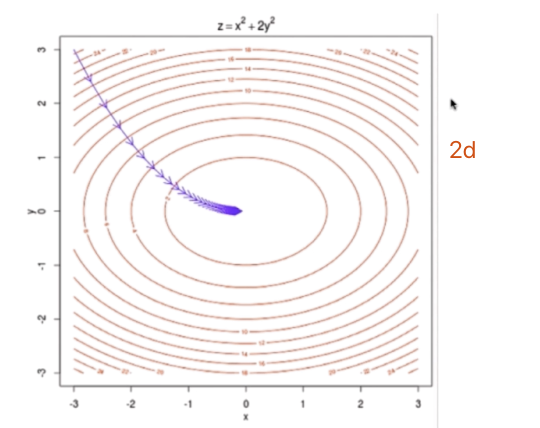

目标：使$\sum_{i=1}{m}(y^{(i)} - \hat{y}^{(i)})^{2}$尽可能小

$\hat{y}^{(i)} = \theta_{0} + \theta_{1}X_{1}^{(i)} + \theta_{2}X_{2}^{(i)} ... + \theta_{n}X_{n}^{(i)}$

target(loss function)：使$\sum_{i=1}^{m}(y^{(i)} - \theta_{0} - \theta_{1}X_{1}^{(i)} - \theta_{2}X_{2}^{(i)} ... - \theta_{n}X_{n}^{(i)})^{2}$

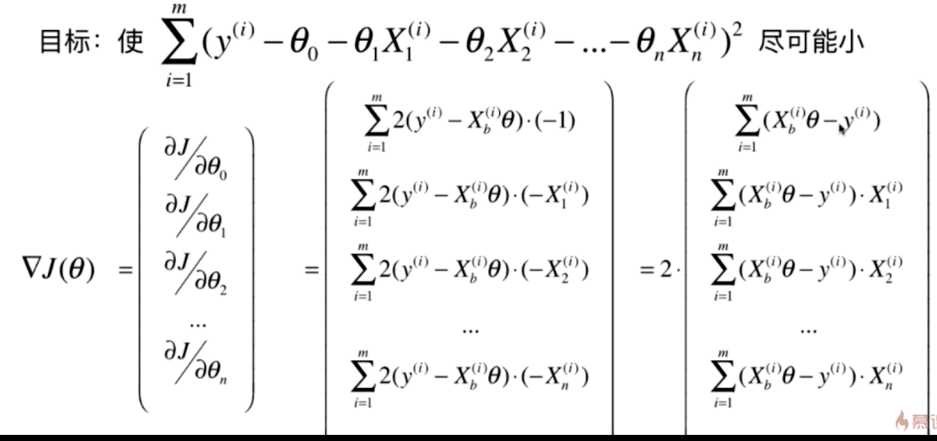

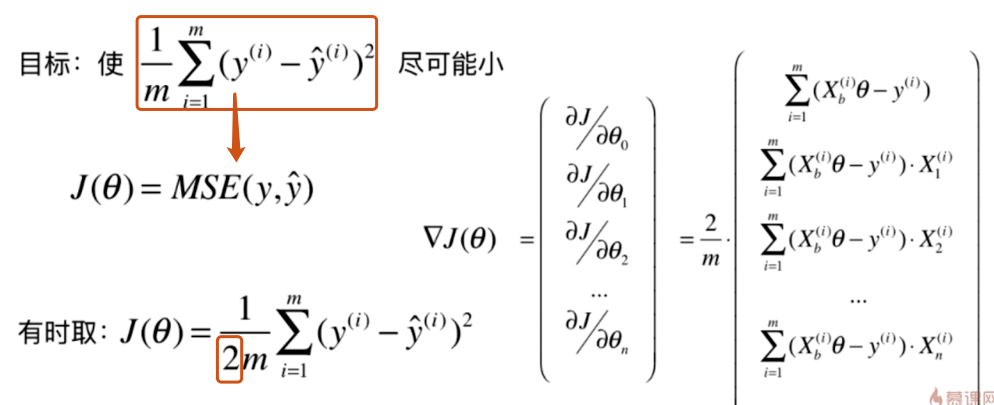
- 效果差别不大 $\frac{1}{m}$ $\frac{1}{2m}$

### 6-4实现线性回归中的梯度下降法

In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
np.random.seed(666)#设计随机种子 可以复现
x = 2 * np.random.random(size=100)
y = x * 3. + 4. +  np.random.normal(size = 100)

In [22]:
X = x.reshape(-1,1)

In [23]:
x.shape

(100,)

In [24]:
y.shape

(100,)

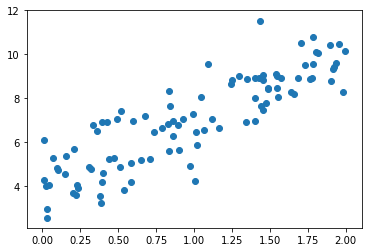

In [25]:
plt.scatter(x,y)
plt.show()

### 使用梯度下降法训练

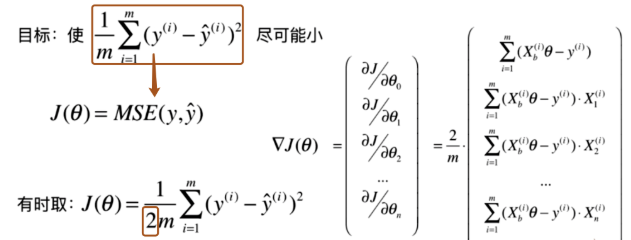

<font size=5>$\frac{1}{m}\sum_{i=1}^{m}(y^{(i)} - X_{b}^{(i)}\theta)^{2}$</font>:求J

In [26]:
def J(theta,x_b,y):#损失函数 包含y以及x
    try:
        return np.sum((y - x_b.dot(theta))**2)/ len(x_b)
    except:
        return float('inf')

<font size=5>$\frac{dJ}{\theta}$</font>:求导数

- <font size=5>$\bigtriangledown J(\theta)$</font>

In [27]:
def dJ(theta,x_b,y):#求导数 
    res = np.empty(len(theta))#开辟一个theta大小的空间 j对theta每个维度求导
    res[0] = np.sum(x_b.dot(theta) - y)#第一维度 很好求
    for i in range(1,len(theta)):
        res[i] = (x_b.dot(theta) - y).dot(x_b[:,i])#观察上面式子 x_{2}^{(i)} 第一维度都需要有结果 第二维度取指定的值
    return res * 2 / len(x_b)

In [28]:
#相对单个特征值 只需要修改 x_b y 以及histroy删除即可
def gradient_descent(x_b,y,initial_theta,eta,n_iters = 1e4 ,epsilon=1e-8):
    theta = initial_theta
    i_iter = 0
    while i_iter < n_iters:
        gradient = dJ(theta,x_b,y)
        last_theta = theta
        theta = theta - eta*gradient
        
        if(abs(J(theta,x_b,y) - abs(J(last_theta,x_b,y))) < epsilon):
            break
        i_iter += 1  
    return theta

In [29]:
x_b = np.hstack([np.ones((len(x),1)),x.reshape(-1,1)])
initial_theta = np.zeros(x_b.shape[1])
eta = 0.01


theta = gradient_descent(x_b,y,initial_theta,eta)

In [30]:
theta

array([4.02145786, 3.00706277])

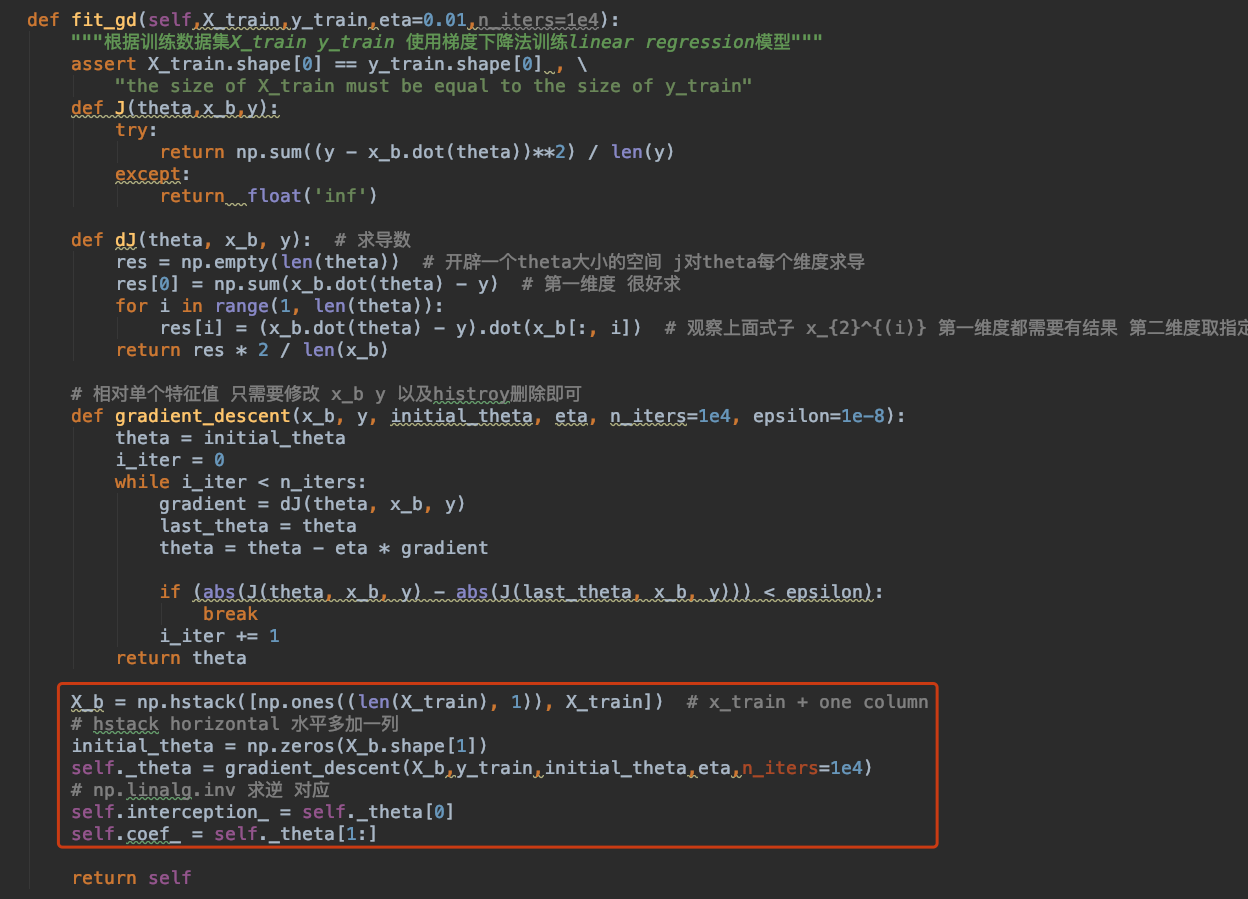

### 封装线性回归算法

In [31]:
from ML_learning.LinearRegression import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit_gd(X,y)

LinearRegression()

In [32]:
lin_reg.coef_

array([3.00706277])

In [33]:
lin_reg.interception_

4.021457858204859

## 6.5梯度下降的向量化和数据标准化

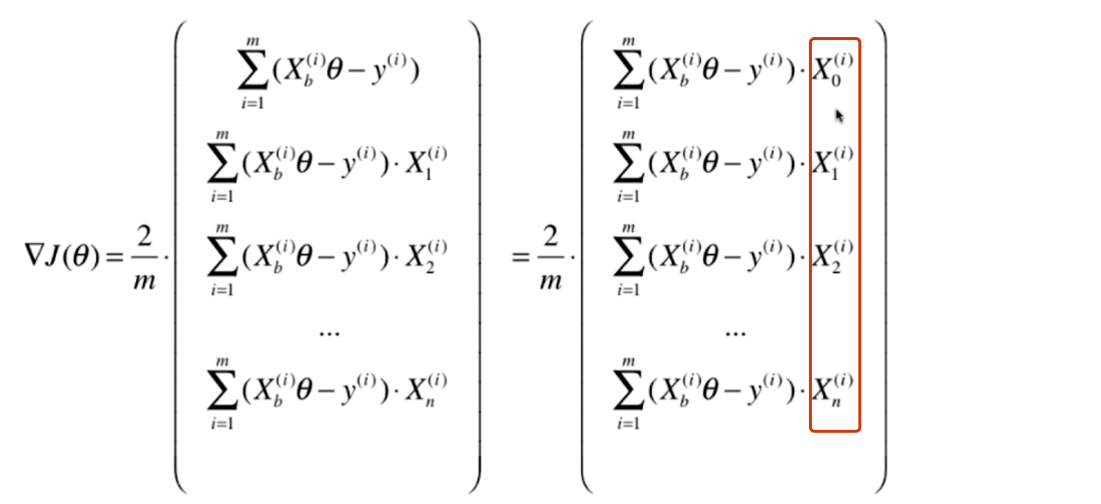
- 处理$X_{0}^{(i)}$ 将其乘在后面 每个值都是1

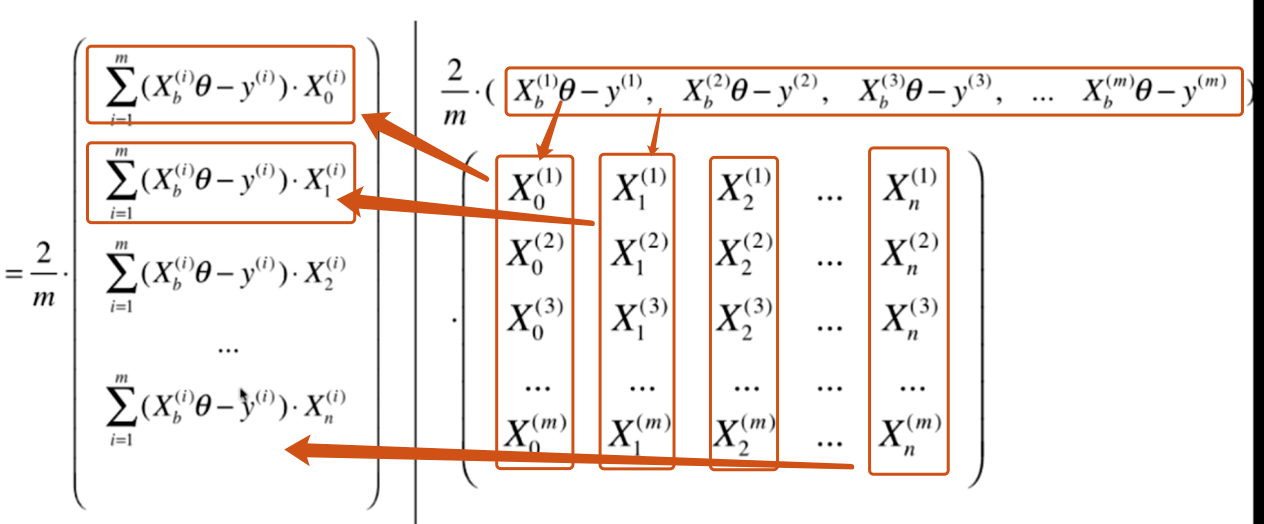
- <font size=5>转换成两个矩阵之间的乘法运算</font>

- <font size=5>[1,m] * [m , n+1]</font>

 - 该矩阵$X_{b}$是$[m , n+1]$ 的矩阵
 
 <font size=5>$\frac{2}{m}.(X_{b}\theta - y)^{T}.X_{b} = \frac{2}{m}.X_{b}^{T}.(X_{b}\theta - y)$</font>
 
 <font size=5>把梯度dJ修改对应代码就行</font>

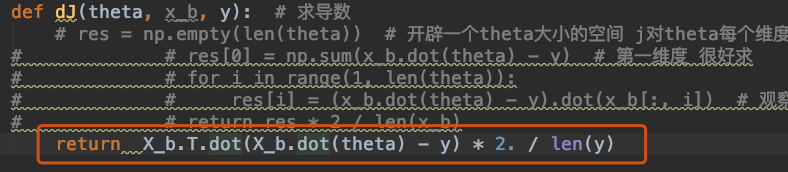

In [34]:
import numpy as np
from sklearn import datasets

In [35]:
boston = datasets.load_boston()
x = boston.data
y = boston.target

x = x[y < 50.0]
y = y[y < 50.0]

In [36]:
from ML_learning.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,seed=666)

In [37]:
from ML_learning.LinearRegression import LinearRegression

lin_reg1 = LinearRegression()
%time lin_reg1.fit_normal(x_train,y_train)
lin_reg1.score(x_test,y_test)

CPU times: user 825 µs, sys: 457 µs, total: 1.28 ms
Wall time: 742 µs


0.8129794056212925

### 使用梯度下降法

In [38]:
lin_reg2 = LinearRegression()
lin_reg2.fit_gd(x_train,y_train)
# encounter overflow

/Users/ccai/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/ccai/jubook/project/ML_learning/LinearRegression.py:35: RuntimeWarning: overflow encountered in square
  return np.sum((y - x_b.dot(theta))**2) / len(y)
/Users/ccai/jubook/project/ML_learning/LinearRegression.py:56: RuntimeWarning: invalid value encountered in double_scalars
  if (abs(J(theta, x_b, y) - abs(J(last_theta, x_b, y))) < epsilon):


LinearRegression()

In [39]:
lin_reg2.coef_
#放入真实数据集

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [40]:
x_train[:10,:]
#观察值的差距 e+2 e+0比较大 因此梯度会比较大


array([[1.42362e+01, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.93000e-01,
        6.34300e+00, 1.00000e+02, 1.57410e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.96900e+02, 2.03200e+01],
       [3.67822e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 7.70000e-01,
        5.36200e+00, 9.62000e+01, 2.10360e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.80790e+02, 1.01900e+01],
       [1.04690e-01, 4.00000e+01, 6.41000e+00, 1.00000e+00, 4.47000e-01,
        7.26700e+00, 4.90000e+01, 4.78720e+00, 4.00000e+00, 2.54000e+02,
        1.76000e+01, 3.89250e+02, 6.05000e+00],
       [1.15172e+00, 0.00000e+00, 8.14000e+00, 0.00000e+00, 5.38000e-01,
        5.70100e+00, 9.50000e+01, 3.78720e+00, 4.00000e+00, 3.07000e+02,
        2.10000e+01, 3.58770e+02, 1.83500e+01],
       [6.58800e-02, 0.00000e+00, 2.46000e+00, 0.00000e+00, 4.88000e-01,
        7.76500e+00, 8.33000e+01, 2.74100e+00, 3.00000e+00, 1.93000e+02,
        1.78000e+01, 3.95560e+02, 7.56000e+00],
       [2.49800e-02, 0.00000e+

In [41]:
lin_reg2.fit_gd(x_train,y_train,eta=0.000001)

LinearRegression()

In [42]:
lin_reg2.score(x_test,y_test)

0.27586818724477224

In [43]:
%time  lin_reg2.fit_gd(x_train,y_train,eta=0.000001,n_iters=1e7)

CPU times: user 405 ms, sys: 4.18 ms, total: 409 ms
Wall time: 422 ms


LinearRegression()

In [44]:
lin_reg2.score(x_test,y_test)

0.27586818724477224

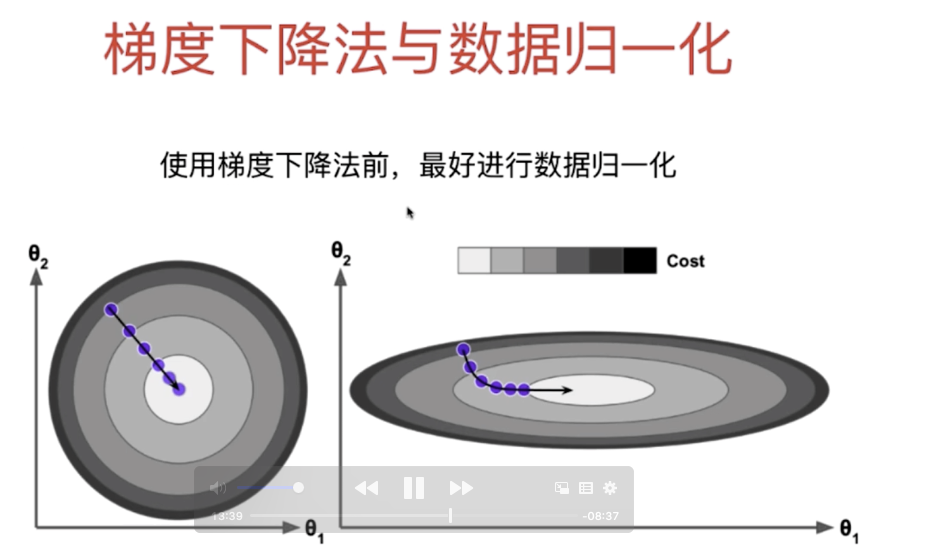
- 数据不再一个维度上 影响梯度结果 *$-\eta$

<font size=5>结果太大 不收敛  结果太小 导致搜索过程太慢 将所有数据进行归一化</font>

### 使用梯度下降法前进行数据归一化

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
stndardScaler = StandardScaler()#实例化
stndardScaler.fit(x_train)#fit

StandardScaler(copy=True, with_mean=True, with_std=True)

In [47]:
x_train_standard = stndardScaler.transform(x_train)

In [48]:
lin_reg3 = LinearRegression()
%time lin_reg3.fit_gd(x_train_standard,y_train)

CPU times: user 192 ms, sys: 2.62 ms, total: 195 ms
Wall time: 197 ms


LinearRegression()

In [49]:
x_test_standard = stndardScaler.transform(x_test)#进行数据归一化 x_test

In [50]:
lin_reg3.score(x_test_standard,y_test)

0.8129873310487505

### 梯度下降法的优势

<font size=5>耗时时间比较小</font>
- 样本大的话 计算梯度比较慢 可以使用随机梯度下降法

In [51]:
m = 1000# 样本
n = 5000# 特征

big_x = np.random.normal(size=(m,n))

true_theta = np.random.uniform(0.0,100.0,size=n+1)

big_y = big_x.dot(true_theta[1:]) + true_theta[0] + np.random.normal(0., 10. , size=m )

In [52]:
big_reg1 = LinearRegression()
%time big_reg1.fit_normal(big_x,big_y)

CPU times: user 14.9 s, sys: 406 ms, total: 15.3 s
Wall time: 8.35 s


LinearRegression()

In [53]:
big_reg2 = LinearRegression()
%time big_reg2.fit_gd(big_x,big_y)

CPU times: user 7.65 s, sys: 80.2 ms, total: 7.73 s
Wall time: 3.98 s


LinearRegression()

## 6.6随机梯度下降法

- 批量梯度下降法： Batch Gradient descent

$$
\frac{2}{m}.
\begin{bmatrix}
\sum_{i=1}^{m}(X_{b}^{(i)}-y^{(i)}.X_{0}^{(i)}) \\
\sum_{i=1}^{m}(X_{b}^{(i)}-y^{(i)}.X_{1}^{(i)}) \\
\sum_{i=1}^{m}(X_{b}^{(i)}-y^{(i)}.X_{2}^{(i)}) \\
\vdots  \\
\sum_{i=1}^{m}(X_{b}^{(i)}-y^{(i)}.X_{n}^{(i)})$
\end{bmatrix} 
$$ 

==>  仅对其中的一个样本进行计算 去掉$\sum$ 不要/m 

==>  向量化 搜索方向 每次随机取出一个(i)

$$
2.\begin{Bmatrix}
(X_{b}^{(i)}\theta - y^{(i)}).X_{0}^{(i)} \\
(X_{b}^{(i)}\theta - y^{(i)}).X_{1}^{(i)} \\
(X_{b}^{(i)}\theta - y^{(i)}).X_{2}^{(i)} \\
\vdots \\
(X_{b}^{(i)}\theta - y^{(i)}).X_{n}^{(i)} 
\end{Bmatrix}
= 2.(X_{b}^{(i)})^{T}.(X_{b}^{(i)}\theta - y^{(i)})
$$

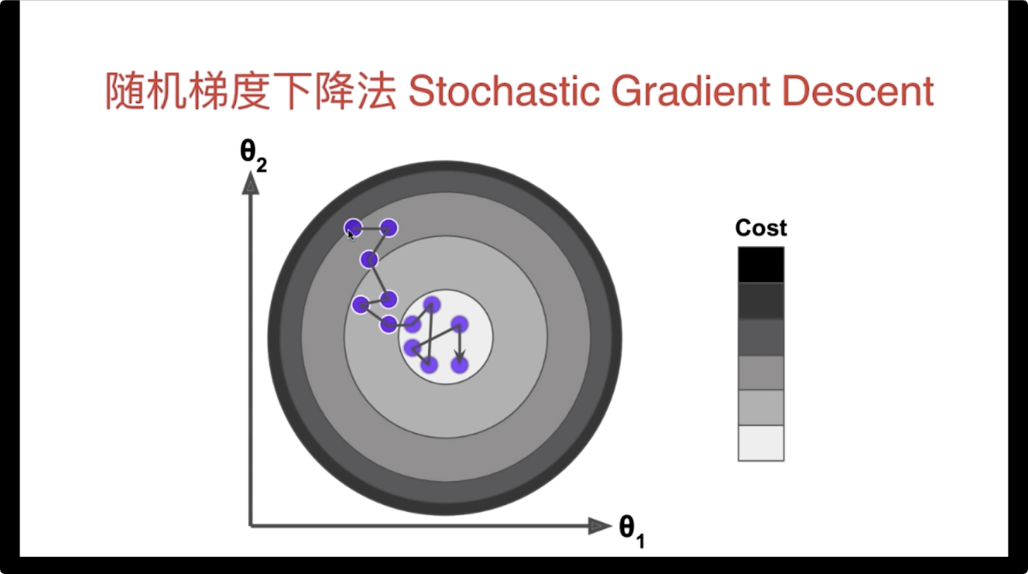
- can't make sure that each direction to the loss function reduces or the fastest reduction of direction
- cant‘t predict
- m 非常大 愿意用精度换时间
- lr 取值很重要 不能取固定值 逐渐递减
- $\eta = \frac{1}{i_iters}$
  - problem: $\eta$ 小 下降比例快
  -  $\eta = \frac{1}{i_iters + b}$  ==> $\eta = \frac{a}{i_iters + b}$
- 模拟退火的思想
- $\eta = \frac{t_{0}}{ i_iters + t_{1}}$

### 随机梯度下降法

In [61]:
import numpy as np
import matplotlib.pyplot as pt

In [62]:
m = 100000

x = np.random.normal(size=m)
X = x.reshape(-1,1)
y = 4.*x + 3. + np.random.normal(0,3,size = m)

In [63]:
def J(theta,x_b,y):#损失函数 包含y以及x
    try:
        return np.sum((y - x_b.dot(theta))**2)/ len(x_b)
    except:
        return float('inf')

def dJ(theta,x_b,y):#求导数 
    res = np.empty(len(theta))#开辟一个theta大小的空间 j对theta每个维度求导
    res[0] = np.sum(x_b.dot(theta) - y)#第一维度 很好求
    for i in range(1,len(theta)):
        res[i] = (x_b.dot(theta) - y).dot(x_b[:,i])#观察上面式子 x_{2}^{(i)} 第一维度都需要有结果 第二维度取指定的值
    return res * 2 / len(x_b)

    #相对单个特征值 只需要修改 x_b y 以及histroy删除即可
def gradient_descent(x_b,y,initial_theta,eta,n_iters = 1e4 ,epsilon=1e-8):
    theta = initial_theta
    i_iter = 0
    while i_iter < n_iters:
        gradient = dJ(theta,x_b,y)
        last_theta = theta
        theta = theta - eta*gradient
        
        if(abs(J(theta,x_b,y) - abs(J(last_theta,x_b,y))) < epsilon):
            break
        i_iter += 1  
    return theta

In [65]:
%%time
x_b = np.hstack([np.ones((len(x),1)),X])
initial_theta = np.zeros(x_b.shape[1])
eta = 0.01
theta = gradient_descent(x_b,y,initial_theta,eta)

CPU times: user 1.16 s, sys: 107 ms, total: 1.26 s
Wall time: 641 ms


In [69]:
theta

array([2.99265616, 4.01188401])

In [66]:
 def dJ_sgd(theta,X_b_i,y_i):
        return X_b_i.T.dot(X_b_i.dot(theta) - y_i) * 2

### 随机梯度下降算法

In [71]:
def sgd(X_b,y,initial_theta,n_iters):
    t0 = 5
    t1 = 50
    
    def learning_rate(t):
        return t0 / (t + t1)
    
    theta = initial_theta
    for cur_iter in range(n_iters):
        rand_i = np.random.randint(len(X_b))
        gradient = dJ_sgd(theta,X_b[rand_i],y[rand_i])
        theta = theta - learning_rate(cur_iter) * gradient
        
    return theta

In [72]:
%%time
X_b = np.hstack([np.ones((len(x),1)),X])
initial_theta = np.zeros(x_b.shape[1])
theta = sgd(X_b,y,initial_theta,n_iters=len(x_b)//3)
#取1/3的数据量 进行测试

CPU times: user 241 ms, sys: 1.88 ms, total: 243 ms
Wall time: 243 ms


In [73]:
theta

array([2.9633152 , 3.98778654])